# exc 1a

Creating a dataset for:

$$
f(x) = \frac{1}{1+25x^2}, \quad x \in [-1,1]
$$

In [110]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
import seaborn as sns 


In [3]:
#n = 100
#x = np.linspace(-1,1, n) #x within interval [-1,1]
#denominator = 1+(25*x**2)
#defining y and adding noise as a normal distrubution with mean 0 and std 1
#y = 1/denominator + np.random.normal(0, 1, x.shape) 


In [ ]:
#Perform a standard ordinary least square regression analysis
#Import polynimial features from func_list and OLS_parameters
from Project1_joint.Malene.func_list import polynomial_features, OLS_parameters#, mse_poly_plot

In [5]:
#The task says to use a polynomial higher than 15 so we have used 16 with intercept not included
#X_task1 = polynomial_features(x, p = 16, intercept = False) 

#checking that it works as it should
#print(X_task1) 

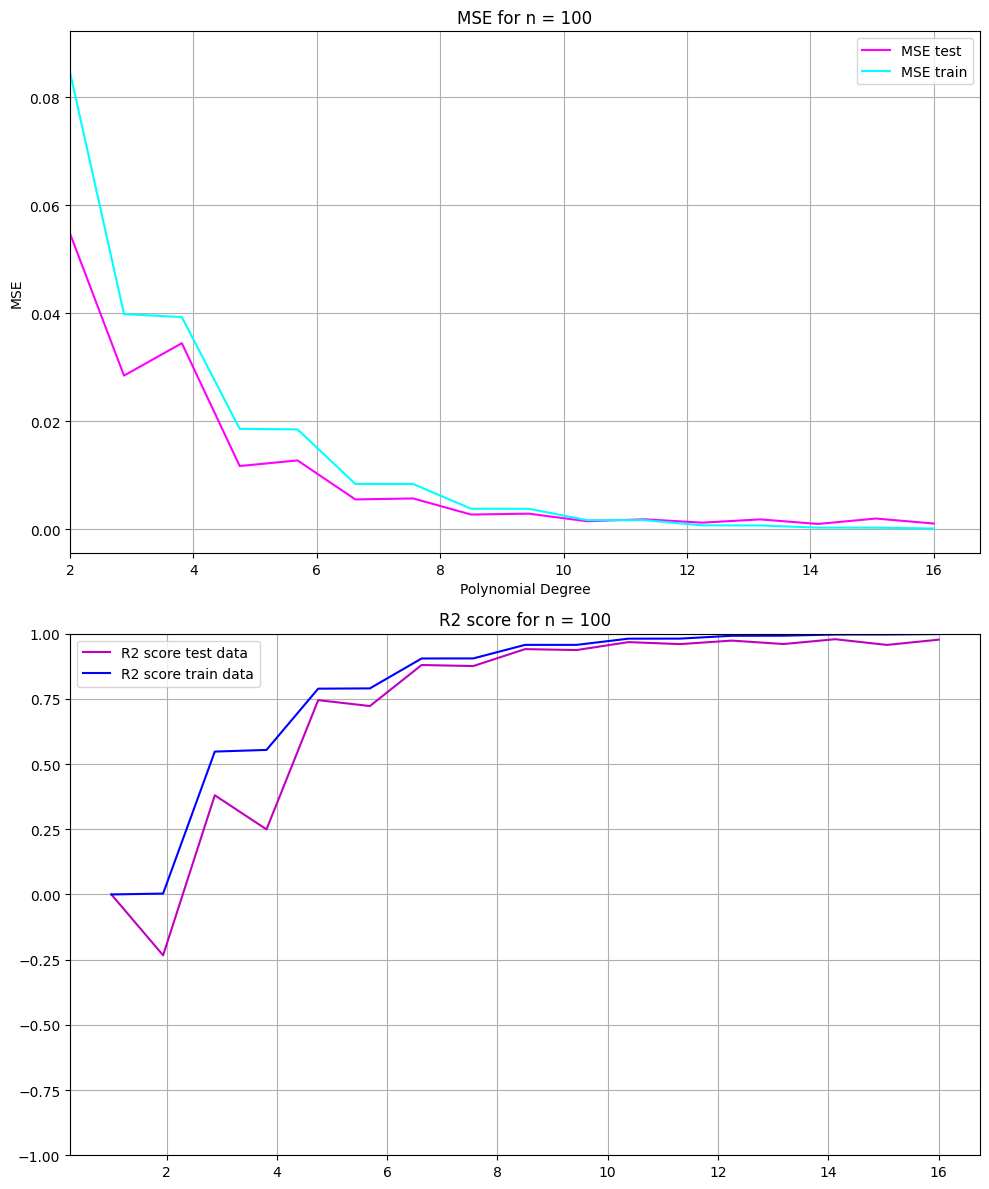

[ 0.00000000e+00 -5.97085012e-02 -1.70277224e+01  2.06955145e+00
  1.66910539e+02 -2.32423123e+01 -9.06718126e+02  1.19556088e+02
  2.84550039e+03 -3.20066536e+02 -5.27687530e+03  4.60241805e+02
  5.69506606e+03 -3.36156360e+02 -3.30118840e+03  9.76537155e+01
  7.93401684e+02]


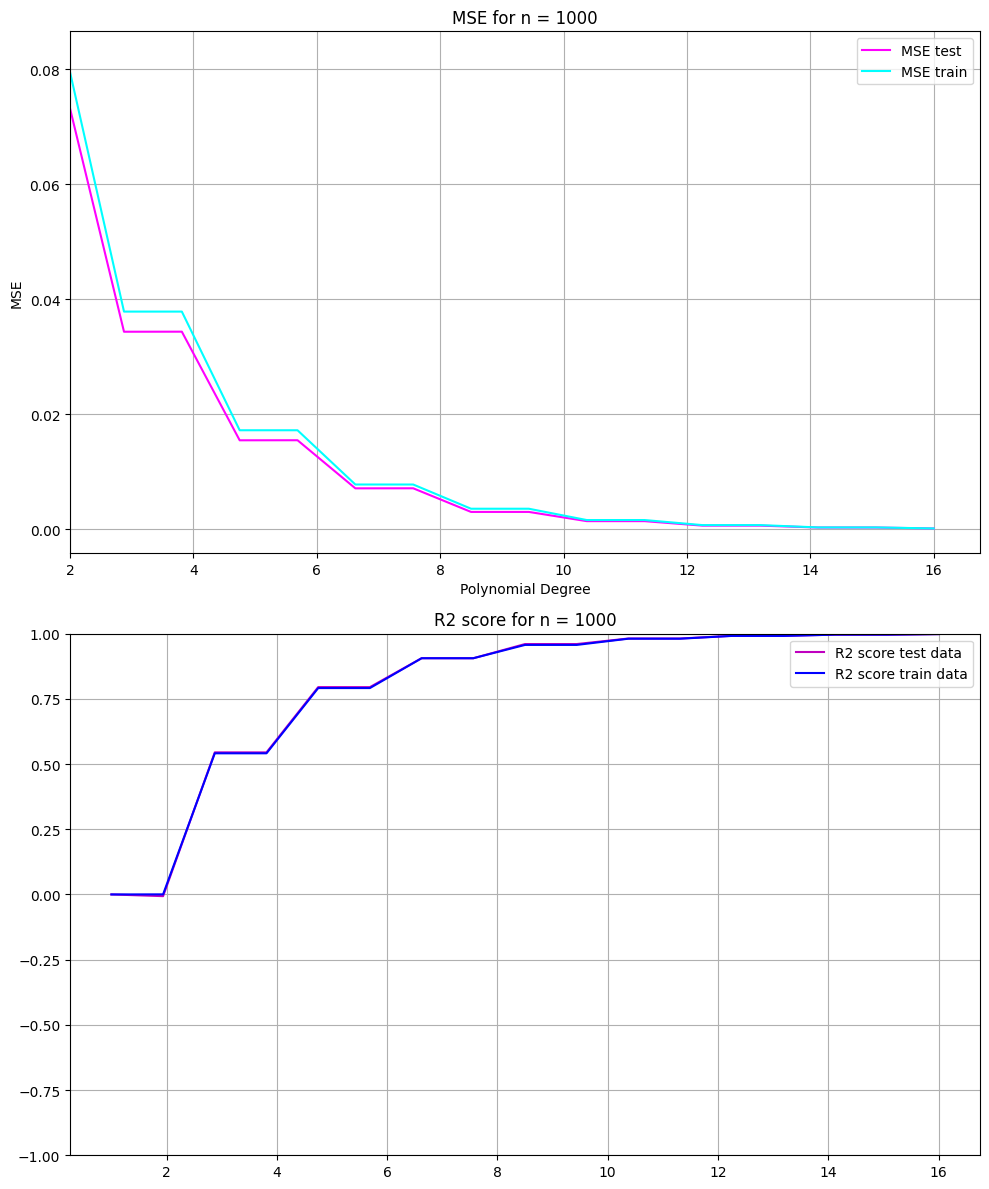

[ 0.00000000e+00 -8.41443166e-03 -1.68929297e+01  1.66006081e-01
  1.64103224e+02 -1.37915655e+00 -8.79930363e+02  5.99537029e+00
  2.71652725e+03 -1.49437310e+01 -4.94474441e+03  2.13444944e+01
  5.23153396e+03 -1.60646440e+01 -2.97126112e+03  4.89659440e+00
  6.99763034e+02]


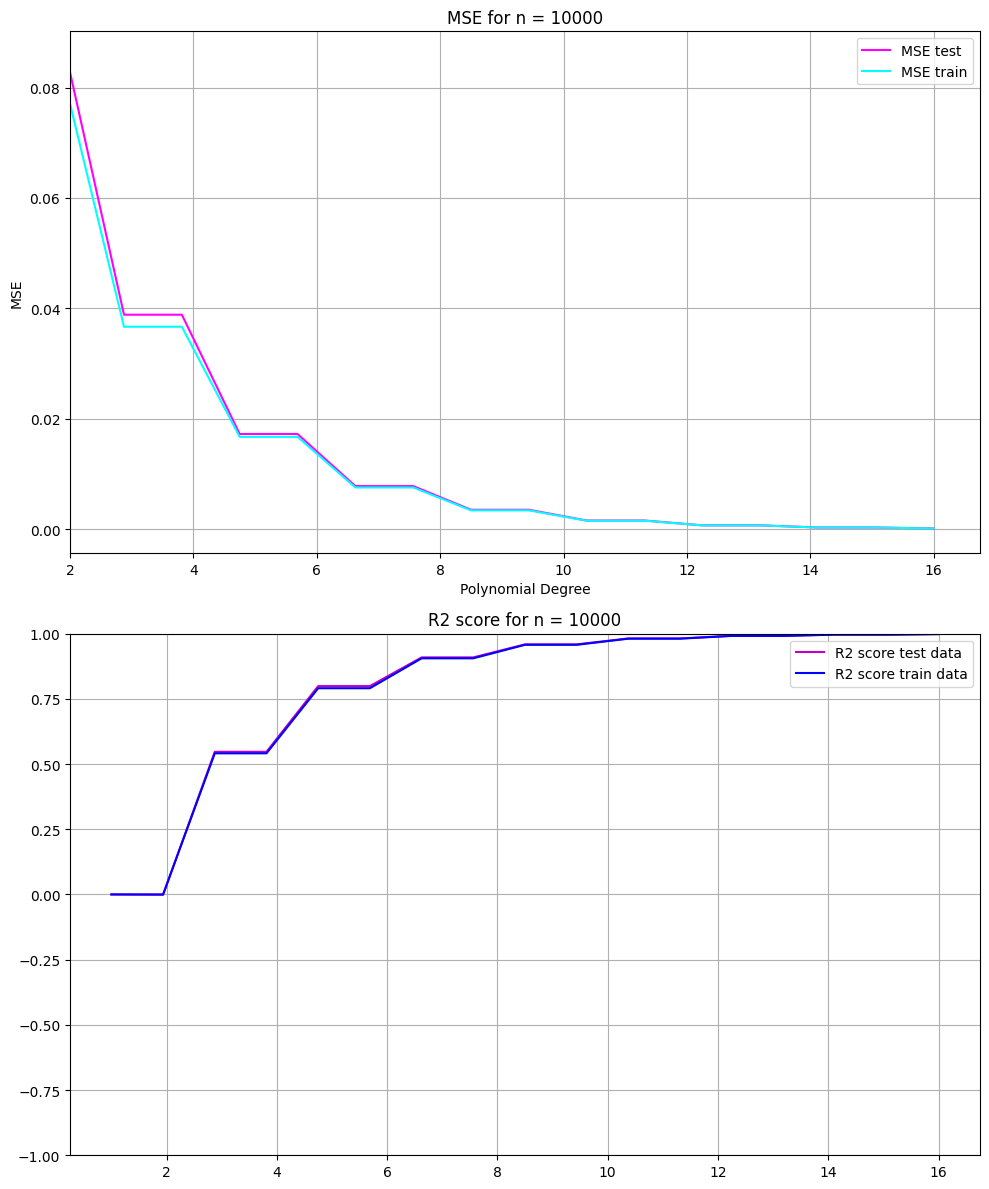

[ 0.00000000e+00 -1.73208743e-03 -1.68006363e+01  4.40298488e-02
  1.62812827e+02 -3.97612313e-01 -8.71791282e+02  1.73467100e+00
  2.68961821e+03 -4.03024788e+00 -4.89478789e+03  5.04453428e+00
  5.17910610e+03 -3.18682562e+00 -2.94222662e+03  7.92233000e-01
  6.93169433e+02]


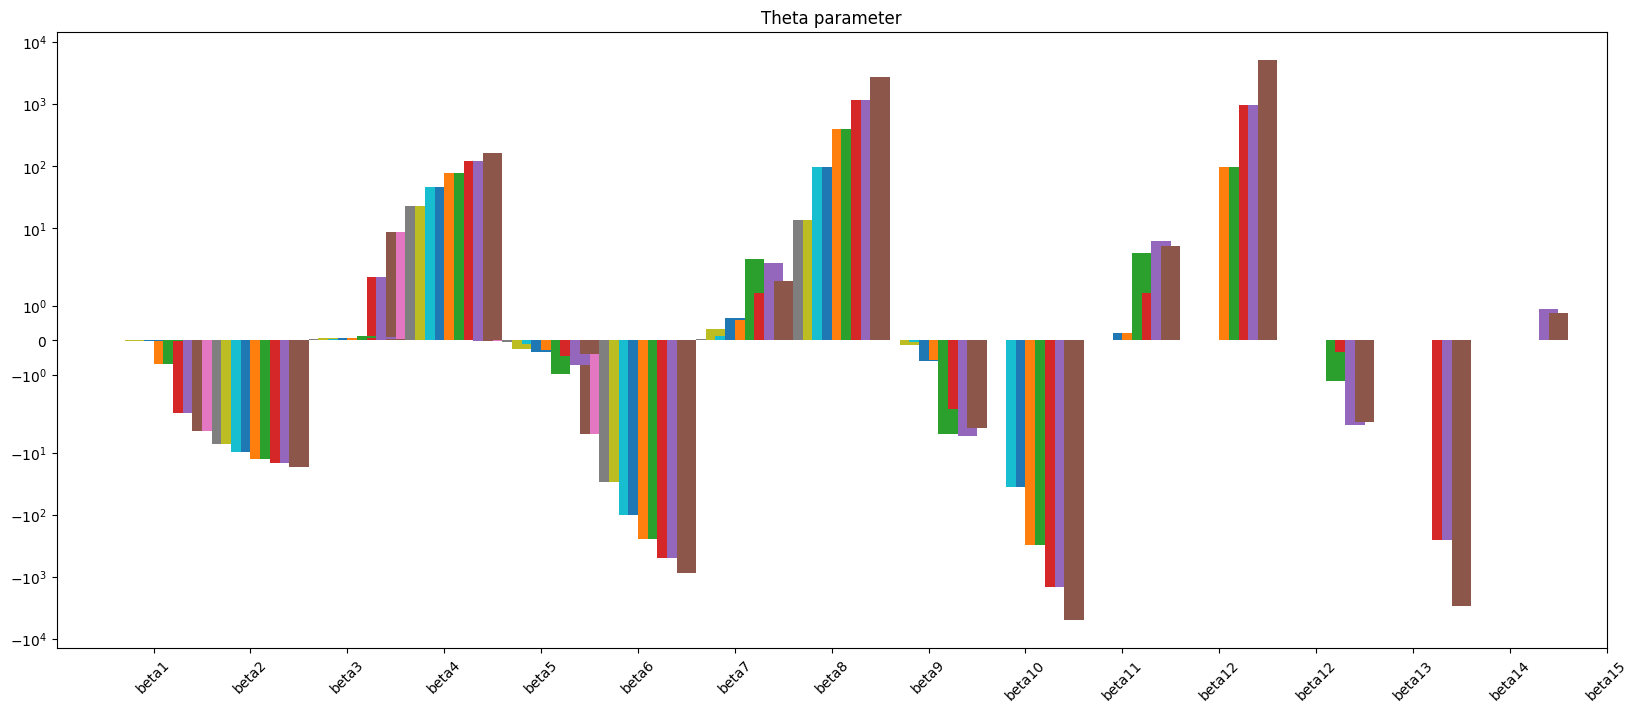

In [274]:
#Now that we have our design matrix, I will use the function mse_poly_plot
#explain the code later!!!!!!!

#MSE and changing the polynomial degree
def mse_poly_plot_OLS(degree, intercept=bool):
    np.random.seed(3155)
    for n in [100,1000,10000]:
        #create dataset
        x = np.linspace(-1,1, n) #x within interval [-1,1]
        denominator = 1+(25*x**2)
        y = 1/denominator# + np.random.normal(0, 1, x.shape) 

        #create empty lists
        poly_deg = np.linspace(1,degree,degree+1)
        mse_train_list = np.zeros(degree+1)
        mse_test_list = np.zeros(degree+1)
        R2_test = np.zeros(degree+1)
        R2_train = np.zeros(degree+1)
        beta_matrix = np.zeros((degree+1, degree+1))

        #range polynomial degree
        for p in range(1, degree+1):
            X = polynomial_features(x,p,intercept=intercept)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
            scaler = StandardScaler(with_std = False)
            scaler.fit(X_train)
            X_train_s = scaler.transform(X_train)
            X_test_s = scaler.transform(X_test)
            y_mean = np.mean(y_train)
            y_scaled_train = (y_train - y_mean) 

            beta = OLS_parameters(X_train_s,y_scaled_train)
        
            y_pred_train = (X_train_s @ beta + y_mean)
            y_pred_test = (X_test_s @ beta + y_mean)

            mse_train_list[p] = MSE(y_train,y_pred_train)
            mse_test_list[p] = MSE(y_test, y_pred_test)

            R2_test[p] = r2_score(y_test, y_pred_test)
            #print(f'The R2 score is: {R2_test} for degree: {p}')
            R2_train[p] = r2_score(y_train, y_pred_train)

            for i in range(len(beta)):
                beta_matrix[p-1,i] = beta[i]    
                #print(beta_matrix)
    

        fig,ax = plt.subplots(2, figsize=(10,12))
        ax[0].plot(poly_deg, mse_test_list, label = "MSE test", color = "magenta")
        ax[0].plot(poly_deg, mse_train_list, label = "MSE train", color = "cyan")
        ax[0].set_title(f'MSE for n = {n}')
        ax[0].set_ylabel("MSE")
        ax[0].set_xlabel("Polynomial Degree")
        ax[1].plot(poly_deg, R2_test, label = 'R2 score test data', color = 'm')
        ax[1].plot(poly_deg, R2_train, label = 'R2 score train data', color = 'b')
        ax[1].set_ylim(-1,1)
        ax[1].set_title(f'R2 score for n = {n}')
        ax[0].set_xlim(2)
        ax[0].grid(True)
        ax[0].legend()
        ax[1].legend()
        ax[1].grid(True)
        plt.tight_layout()
        plt.show()
        print(beta)

    
    num_rows, num_columns = beta_matrix.shape
    names = ['beta1', 'beta2', 'beta3', 'beta4', 'beta5', 'beta6', 'beta7', 'beta8', 'beta9', 'beta10', 'beta11', 'beta12', 'beta12', 'beta13', 'beta14', 'beta15']
    bar_width = 0.1
    r = np.arange(num_columns)
    plt.figure(figsize=(20,8))
    for m in range(num_rows): 
        plt.bar(r + m * bar_width, beta_matrix[m, :degree+1], label = f'Row: {m+1}', width=0.2)
        plt.xticks(range(2,degree+2),names, rotation = 45)
        plt.yscale('symlog')
        plt.title('Theta parameter')
        plt.xlim(1)



    return beta

beta_ols = mse_poly_plot_OLS(degree=16, intercept=False)

In the above code we have used the optimization of OLS to find the parameter theta of a 
linear regression model that best describes/fits our data by minimizing the sum 
sum of the squared differences between the actual data points and the predicted values.

# Exercise 1B

In [ ]:
from Project1_joint.Malene.func_list import Ridge_parameters

#MSE and changing lambda
def poly_plot_ridge(intercept=False, annotate = False):
    np.random.seed(3155)
    nlambdas = 16
    lambdas = np.logspace(-5,1,nlambdas)
    degree = 16
    poly_deg = np.arange(1,degree,degree+1) #c 
    for n in [100,1000,10000]:
        #create dataset
        x = np.linspace(-1,1, n) #x within interval [-1,1]
        denominator = 1+(25*x**2)
        y = 1/denominator# + np.random.normal(0, 1, x.shape) 

        #create empty lists
        mse_train_list = np.zeros((degree, nlambdas,))
        mse_test_list = np.zeros((degree, nlambdas))
        R2_test = np.zeros((degree, nlambdas))
        R2_train = np.zeros((degree, nlambdas))
        #beta_matrix = np.zeros(((nlambdas+1, nlambdas)))

        #range polynomial degree
        for p in range(1, degree+1):
            for j, lmb in enumerate(lambdas):
                X = polynomial_features(x,p,intercept=intercept)
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
                scaler = StandardScaler(with_std = True) #scale with standard deviation this time
                scaler.fit(X_train)
                X_train_s = scaler.transform(X_train)
                X_test_s = scaler.transform(X_test)
                y_mean = np.mean(y_train)
                #y_std = np.std(y_train)
                y_scaled_train = (y_train - y_mean) #centered, not scaled

                beta = Ridge_parameters(X_train_s, y_scaled_train, lmb)
    
                y_pred_train = (X_train_s @ beta + y_mean)
                y_pred_test = (X_test_s @ beta + y_mean)

                mse_train_list[p-1,j] = MSE(y_train,y_pred_train)
                mse_test_list[p-1,j] = MSE(y_test, y_pred_test)

                R2_test[p-1,j] = r2_score(y_test, y_pred_test)
                R2_train[p-1,j] = r2_score(y_train, y_pred_train)
        
        fig,axes = plt.subplots(2,2, figsize=(16,16)) #c 
        titles = ['MSE train', 'MSE test', '$R^2$ train', '$R^2$ test']
        data = [mse_train_list, mse_test_list, R2_train, R2_test]
        for ax, title,plotting in zip(axes.ravel(), titles, data):
            sns.heatmap(plotting, ax=ax, xticklabels=[f'{lmb:.1e}' for lmb in lambdas], yticklabels=np.arange(1,degree+1), cmap='PiYG', annot = annotate, cbar = True)
            ax.set_title(f'{title} for n: {n}')
            ax.set_ylabel('Polynomial Degree')
            ax.set_xlabel(f'$\lambda$')
            ax.invert_yaxis()
            ax.invert_xaxis()
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    plt.tight_layout()
    plt.show()
    #return mse_test_list, mse_train_list
    return beta

    #return mse_test_list, mse_train_list

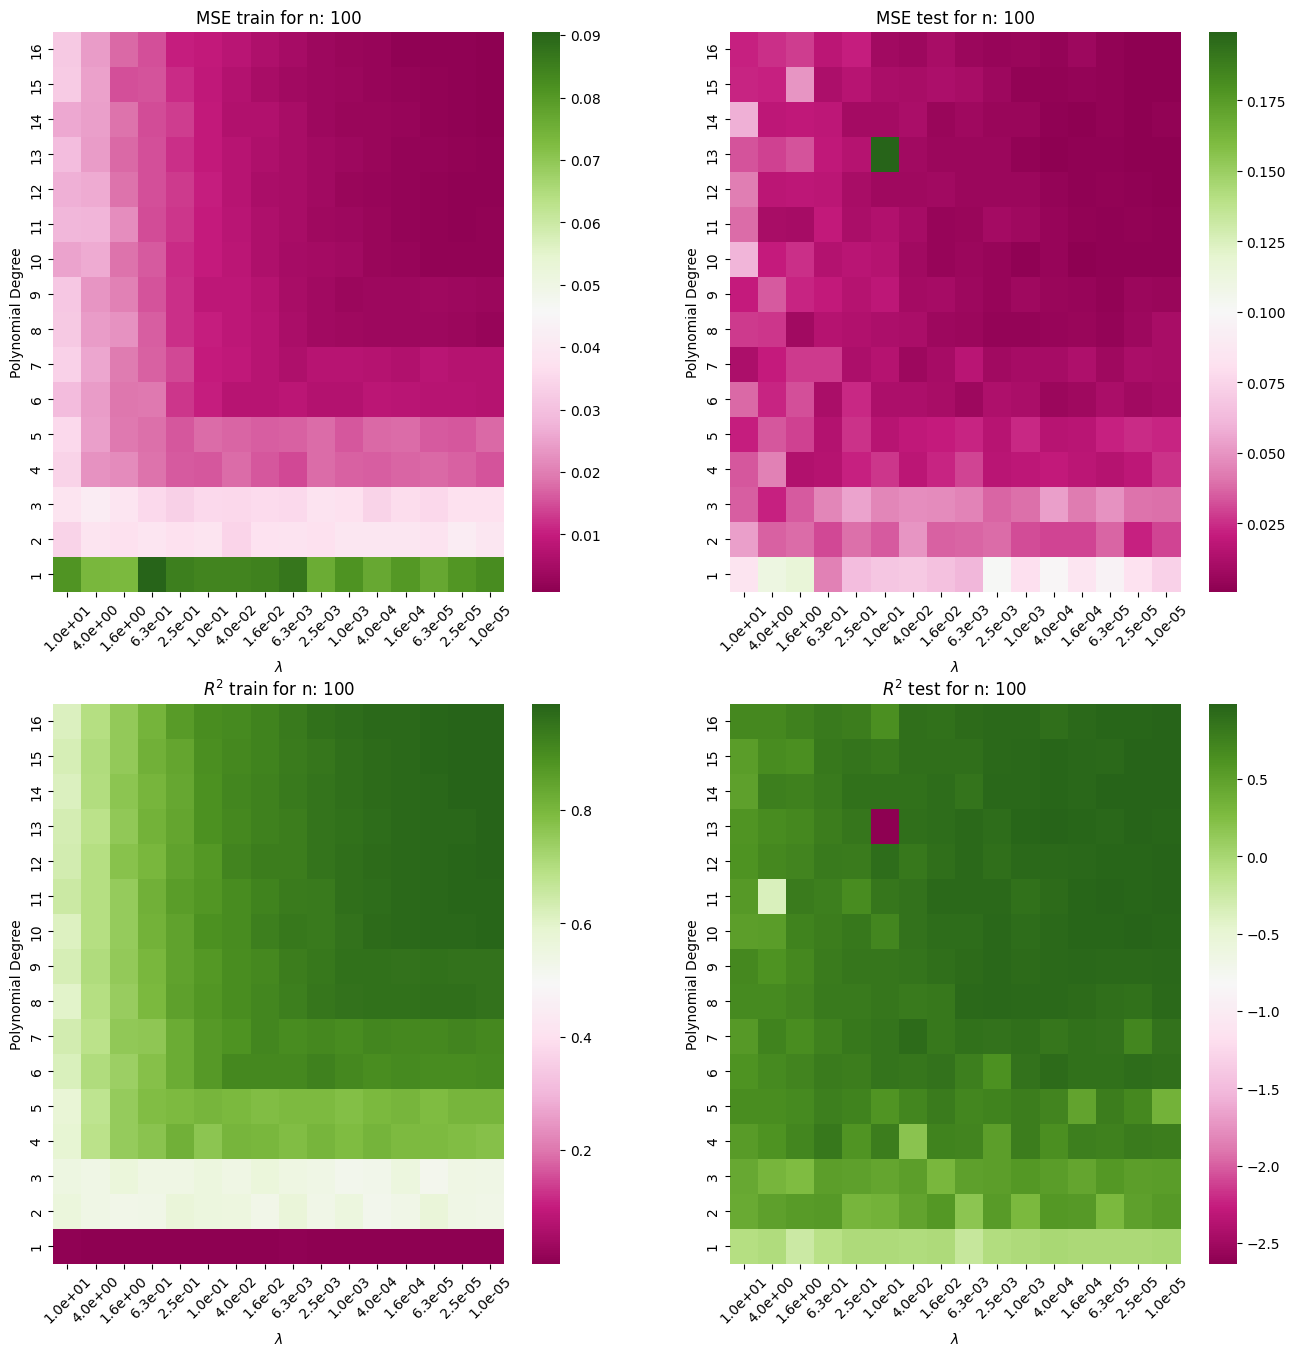

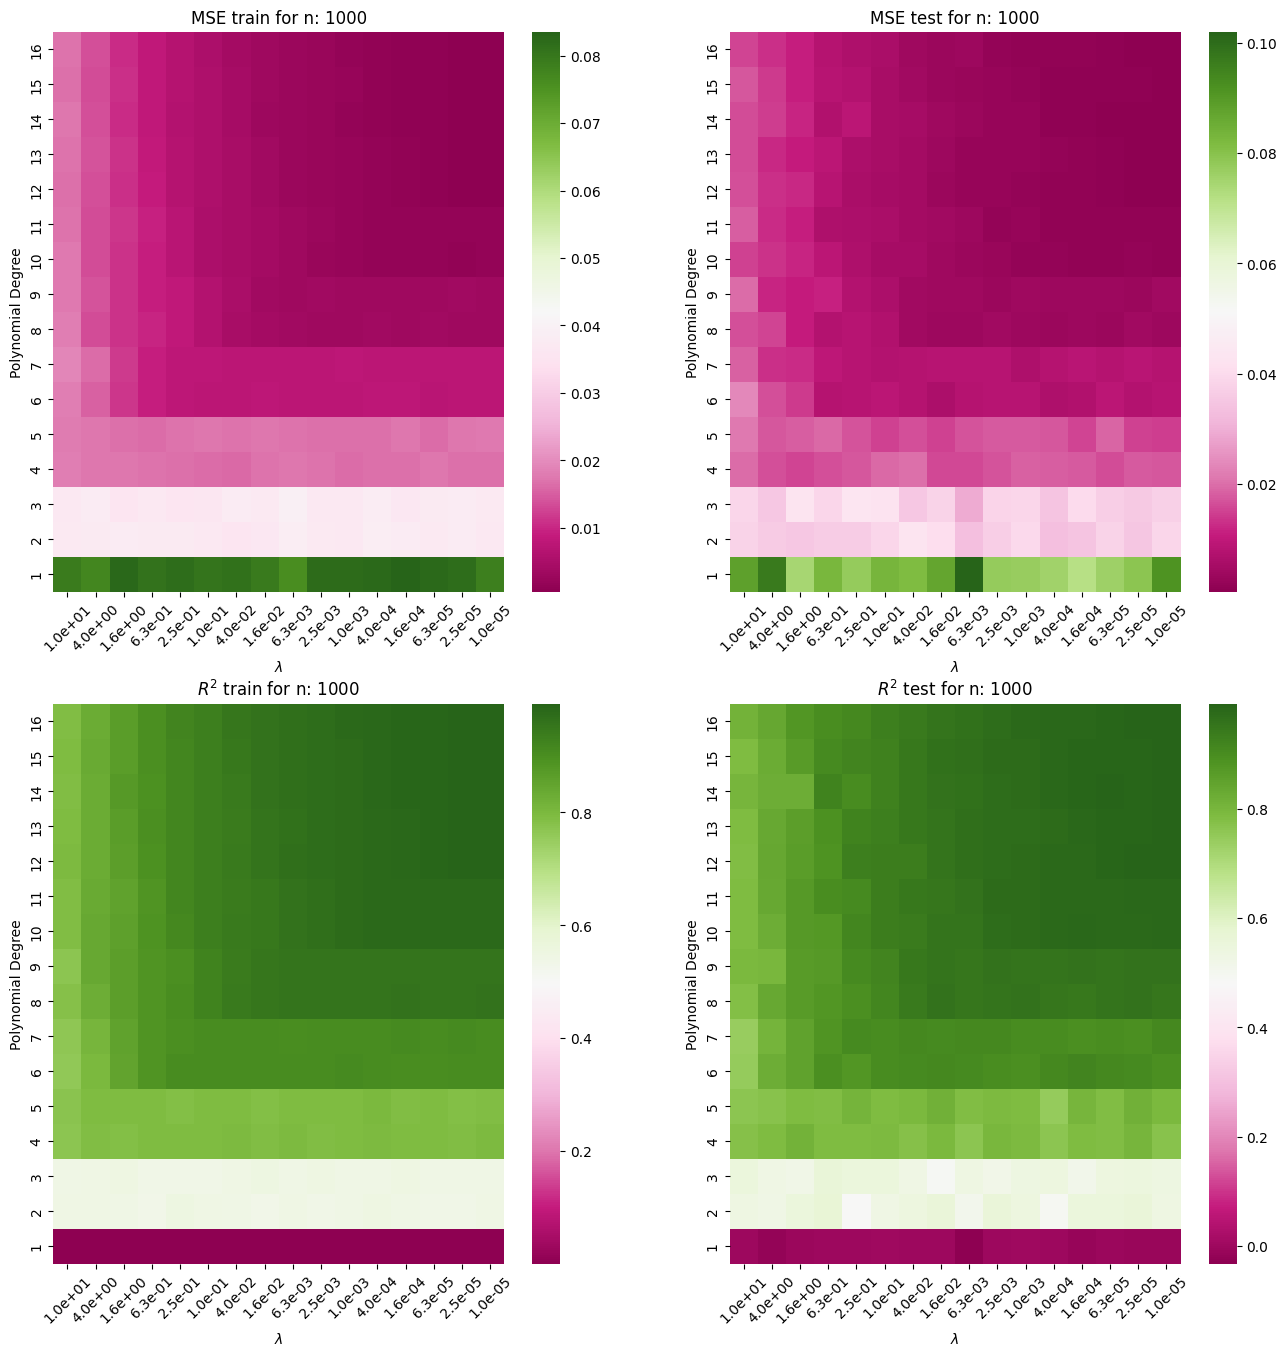

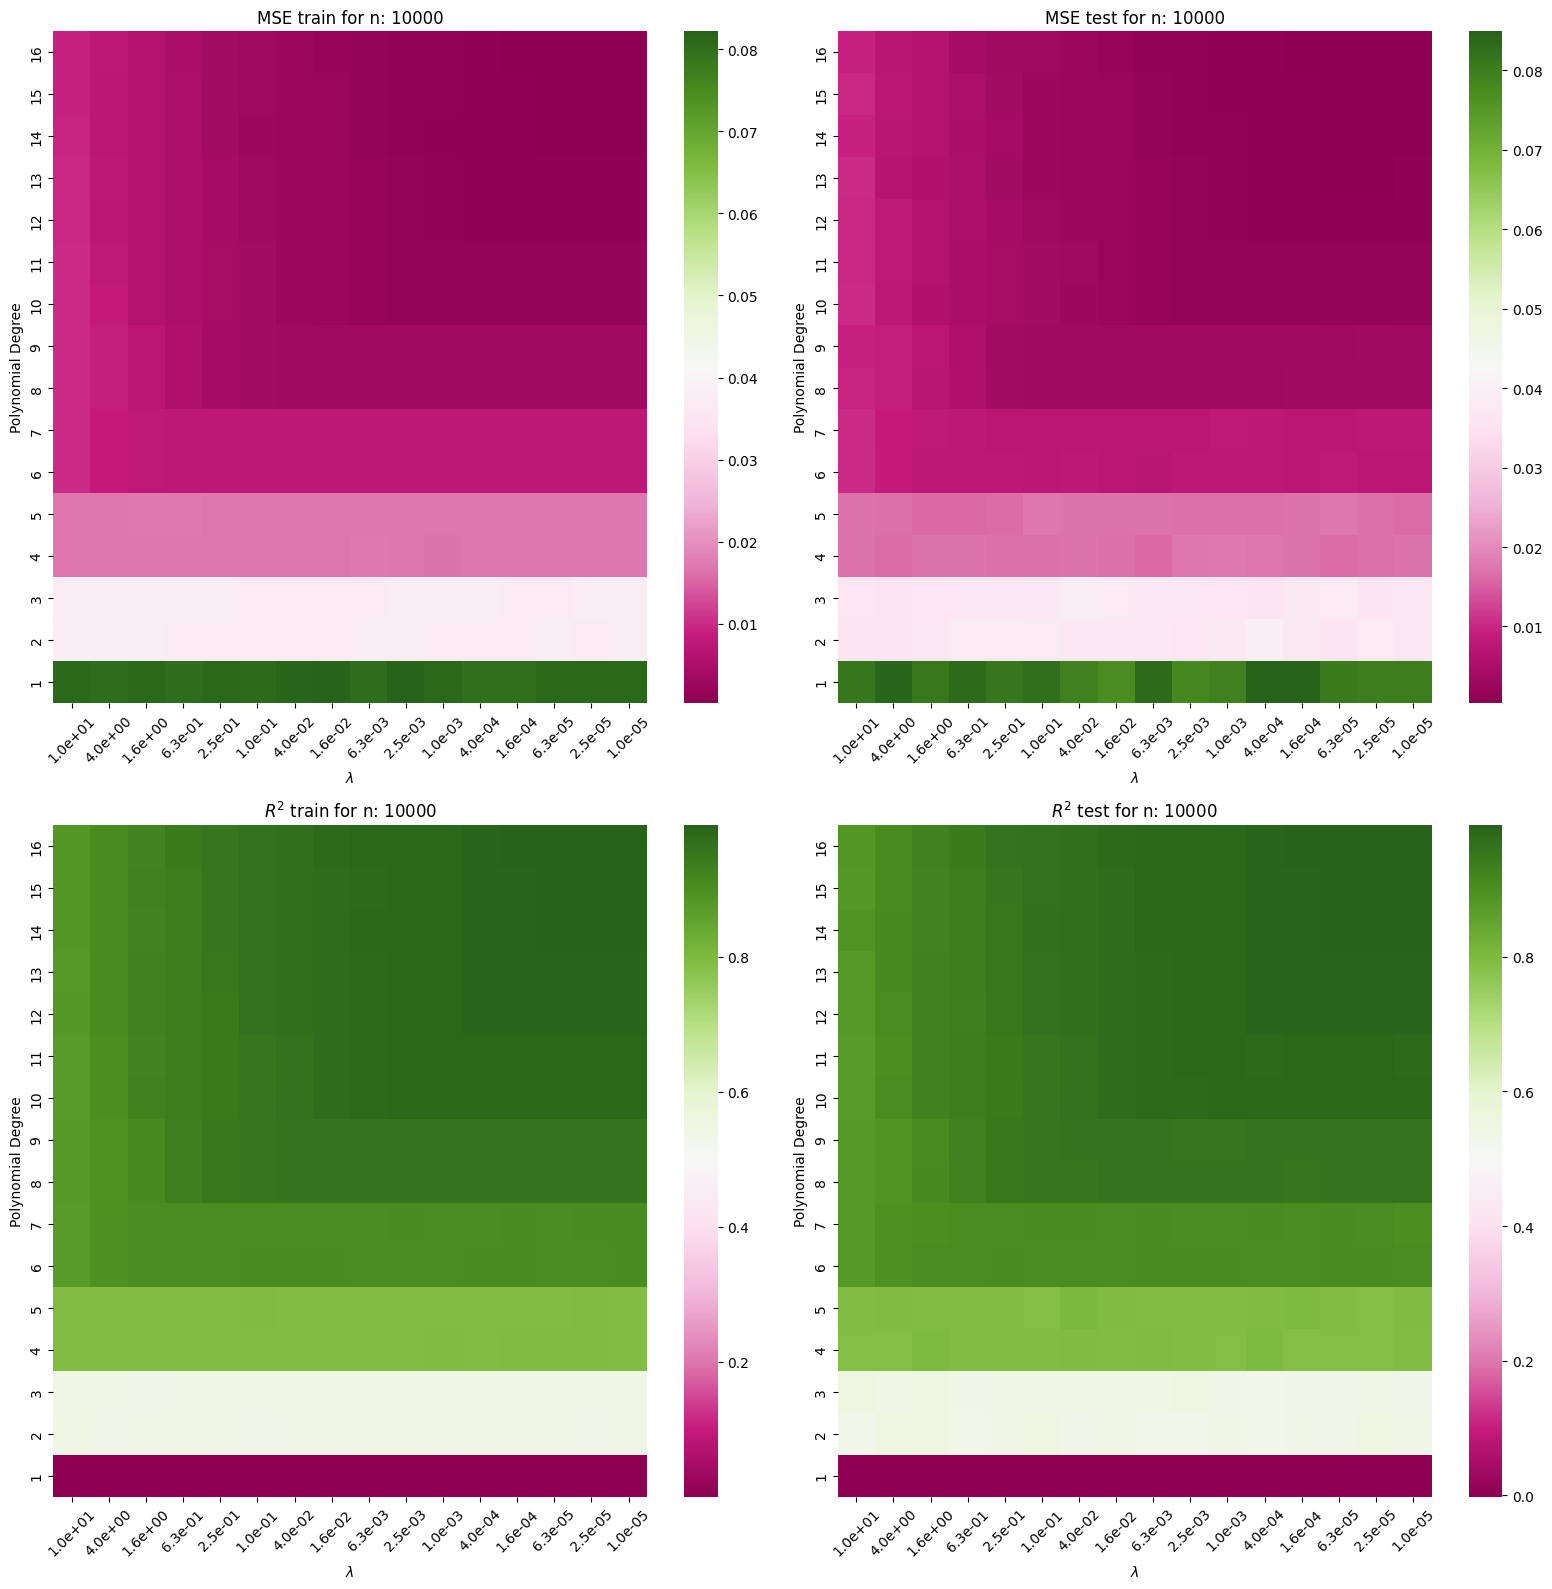

In [224]:
beta_ridge = poly_plot_ridge()

# exercise 1C

In [304]:
#create dataset 
n = 100
x = np.linspace(-1,1, n) #x within interval [-1,1]
denominator = 1+(25*x**2)
y = 1/denominator# + np.random.normal(0, 1, x.shape)

def gradient(x,y,n_feat, degree=17):
    np.random.seed(3155)
    #define variables 
    num_iters = 1000
    eta = 0.1
    lam = 0.1 #fixed lambda for the Ridge
    theta_gdOLSn = np.zeros(n_feat) #OLS
    theta_gdRidgen = np.zeros(n_feat) #Ridge
    r2_gdOLSn_test = np.zeros(n_feat)
    r2_gdRidgen_test = np.zeros(n_feat)
    r2_gdOLSn_train = np.zeros(n_feat)
    r2_gdRidgen_train = np.zeros(n_feat)

    
    #loop
    for p in range(1,degree+1):
    #Create X_polynomial and scale 
        X = polynomial_features(x,15, intercept = False)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        scaler = StandardScaler(with_std=True)
        scaler.fit(X_train) 
        X_train_s = scaler.transform(X_train)
        X_test_s = scaler.transform(X_test)
        y_mean = np.mean(y_train)
        y_std = np.std(y_train)
        y_scaled_train = (y_train - y_mean)/y_std

        #gradient descent OLS 
        for t in range(num_iters):
            grad_OLSn = (2.0/n)*X_train_s.T @ (X_train_s @ theta_gdOLSn-y_scaled_train)
            theta_gdOLSn -= grad_OLSn * eta

        #gradient descent Ridge
        tol = 1e-10
        for t in range(num_iters):
        # Compute gradients for Ridge
            grad_Ridgen = (2.0/n)*X_train_s.T @ (X_train_s @ (theta_gdRidgen)-y_scaled_train)+2*lam*theta_gdRidgen
            # Update parameters theta
            theta_gdRidgen -= grad_Ridgen * eta 
    
            if (np.linalg.norm(grad_Ridgen*eta) < tol):
                print(f'loop broken at {str(t)} for degree: {p}')
                break
        """
        FIKSE R2 senere
        y_pred_train_OLS = (X_train_s @ theta_gdOLSn + y_mean)
        y_pred_test_OLS = (X_test_s @ theta_gdOLSn + y_mean)
        y_pred_train_Ridge = (X_train_s @theta_gdRidgen + y_mean)
        y_pred_test_Ridge = (X_test_s @ theta_gdRidgen + y_mean)

        r2_gdOLSn_test[p-1] = r2_score(y_test, y_pred_test_OLS)
        r2_gdRidgen_test[p-1] = r2_score(y_test, y_pred_test_Ridge)
        r2_gdOLSn_train[p-1] = r2_score(y_train, y_pred_train_OLS)
        r2_gdRidgen_train[p-1] = r2_score(y_train, y_pred_train_Ridge)
        """

    fig,ax = plt.subplots(2,1,figsize=(12,10))
    ax[0].plot(theta_gdOLSn, color = "m", label = "OLS")
    ax[0].set_title("OLS loss")
    ax[0].set_xlabel("Iterations")
    ax[0].set_ylabel("Loss")
    ax[0].legend()
    ax[0].grid(True)
    ax[1].plot(theta_gdRidgen, color = "m", label = 'Ridge')
    ax[1].set_title("Ridge loss")
    ax[1].set_xlabel("Iterations")
    ax[1].set_ylabel("Loss")
    ax[1].legend()
    ax[1].grid(True)
    plt.tight_layout()

    #print("Gradient Descent OLS coefficients:", theta_gdOLSn)
    #print("Gradient Descent Ridge coefficients:", theta_gdRidgen)
    return theta_gdOLSn,theta_gdRidgen


loop broken at 823 for degree: 1
loop broken at 703 for degree: 2
loop broken at 756 for degree: 3
loop broken at 731 for degree: 4
loop broken at 705 for degree: 5
loop broken at 685 for degree: 6
loop broken at 747 for degree: 7
loop broken at 703 for degree: 8
loop broken at 698 for degree: 9
loop broken at 749 for degree: 10
loop broken at 689 for degree: 11
loop broken at 720 for degree: 12
loop broken at 711 for degree: 13
loop broken at 759 for degree: 14
loop broken at 738 for degree: 15
loop broken at 663 for degree: 16
loop broken at 692 for degree: 17


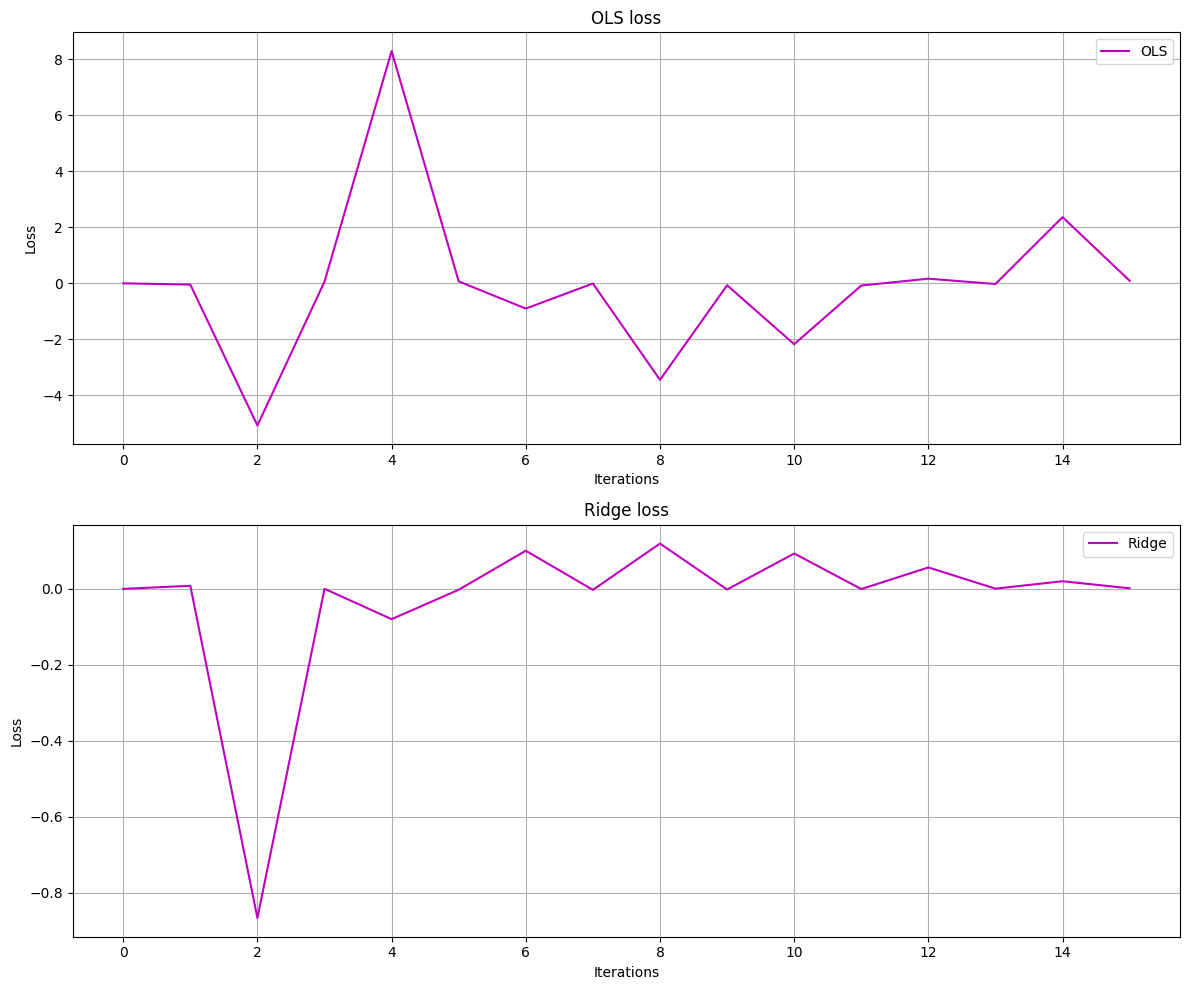

In [305]:
theta_grad_ols, theta_grad_ridge = gradient(x,y, n_feat=16)

In [260]:
def print_shape(array1,array2,array3,array4):
    print(f'The shape of OLS: {array1.shape}')
    print(f'The shape of Ridge: {array2.shape}')
    print(f'The shape of OLS Gradient: {array3.shape}')
    print(f'The shape of Ridge Gradient: {array4.shape}')

print_shape(beta_ols,beta_ridge,theta_grad_ols, theta_grad_ridge )

The shape of OLS: (17,)
The shape of Ridge: (17,)
The shape of OLS Gradient: (16,)
The shape of Ridge Gradient: (16,)


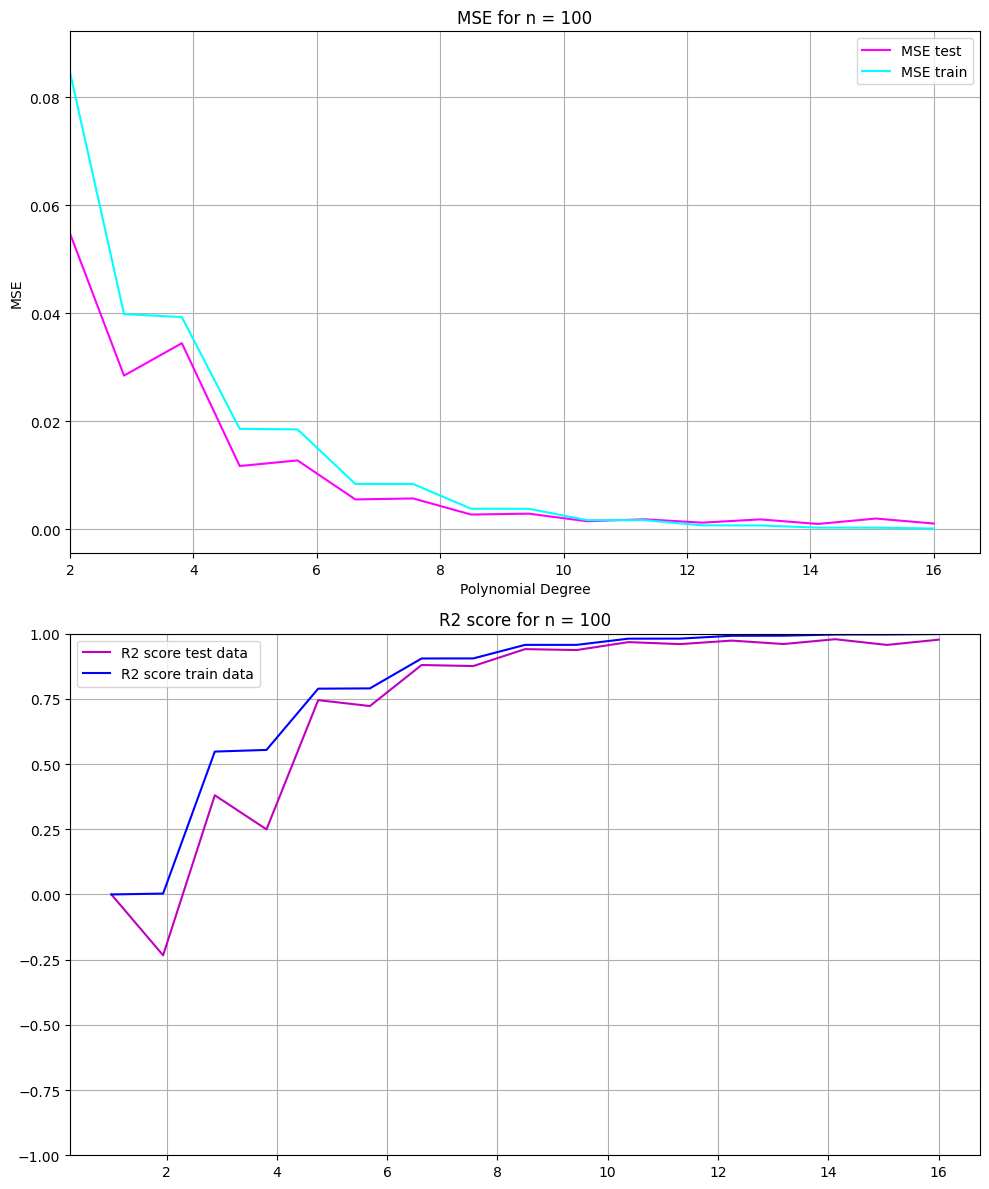

[ 0.00000000e+00 -5.97085012e-02 -1.70277224e+01  2.06955145e+00
  1.66910539e+02 -2.32423123e+01 -9.06718126e+02  1.19556088e+02
  2.84550039e+03 -3.20066536e+02 -5.27687530e+03  4.60241805e+02
  5.69506606e+03 -3.36156360e+02 -3.30118840e+03  9.76537155e+01
  7.93401684e+02]


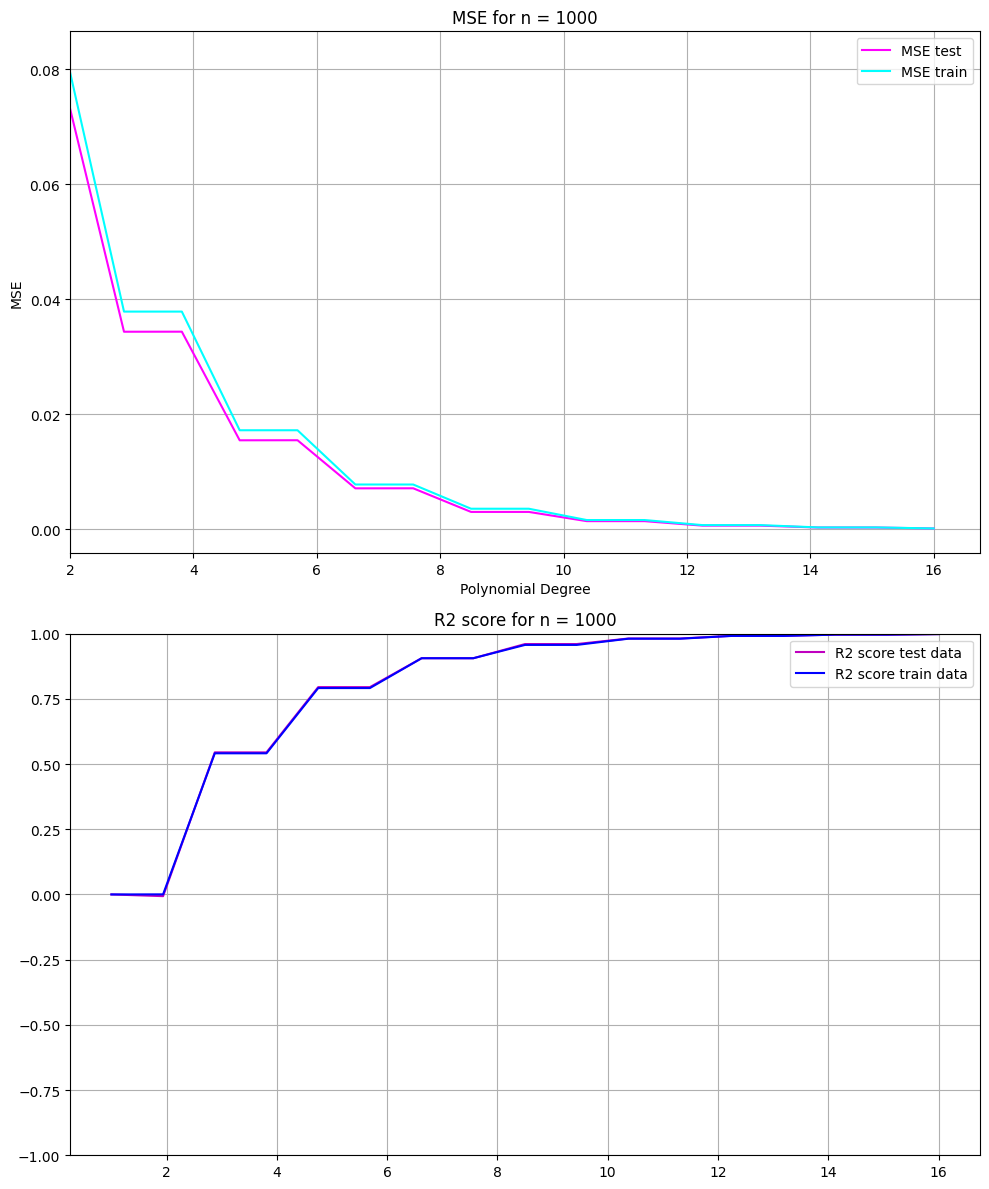

[ 0.00000000e+00 -8.41443166e-03 -1.68929297e+01  1.66006081e-01
  1.64103224e+02 -1.37915655e+00 -8.79930363e+02  5.99537029e+00
  2.71652725e+03 -1.49437310e+01 -4.94474441e+03  2.13444944e+01
  5.23153396e+03 -1.60646440e+01 -2.97126112e+03  4.89659440e+00
  6.99763034e+02]


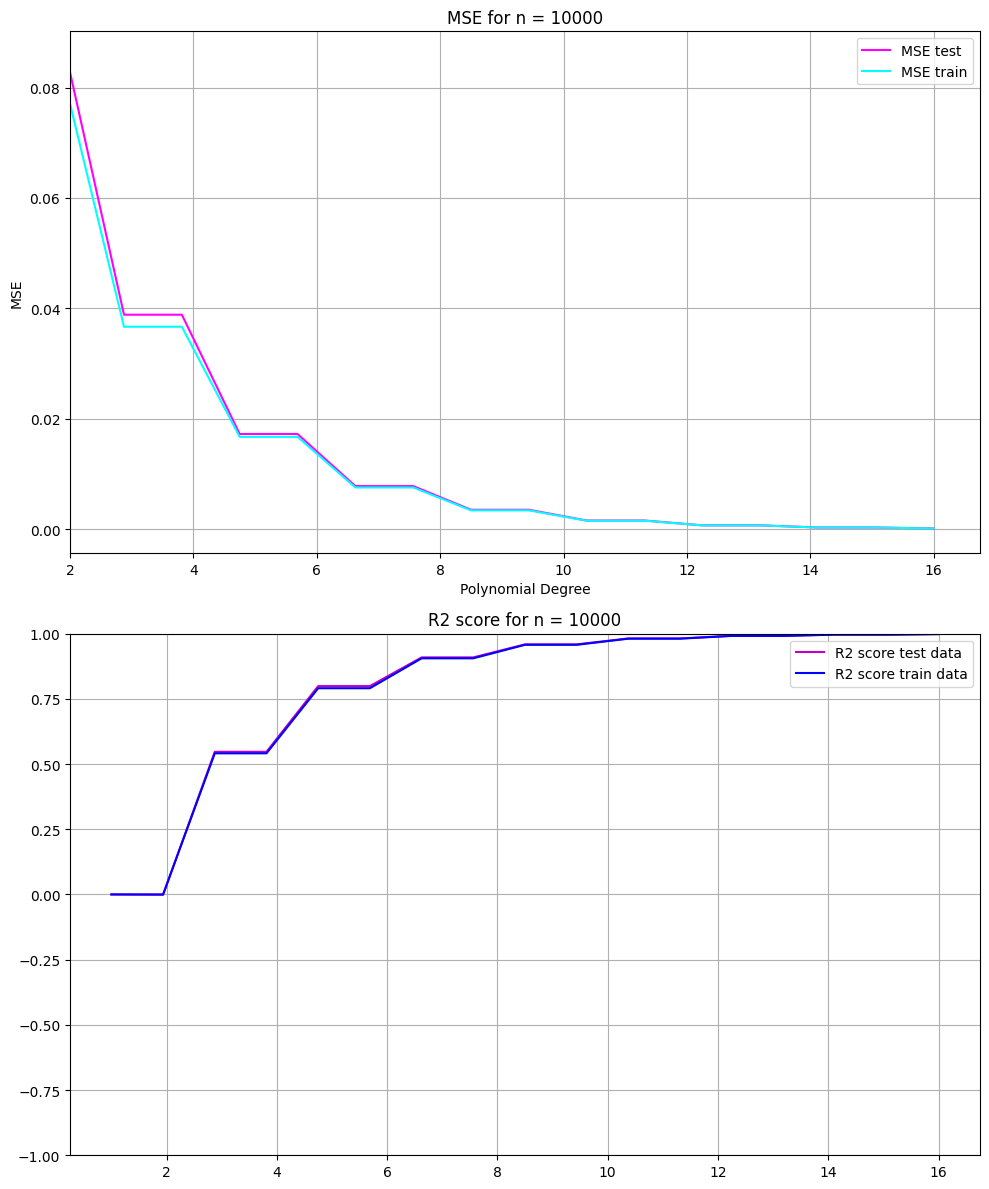

[ 0.00000000e+00 -1.73208743e-03 -1.68006363e+01  4.40298488e-02
  1.62812827e+02 -3.97612313e-01 -8.71791282e+02  1.73467100e+00
  2.68961821e+03 -4.03024788e+00 -4.89478789e+03  5.04453428e+00
  5.17910610e+03 -3.18682562e+00 -2.94222662e+03  7.92233000e-01
  6.93169433e+02]


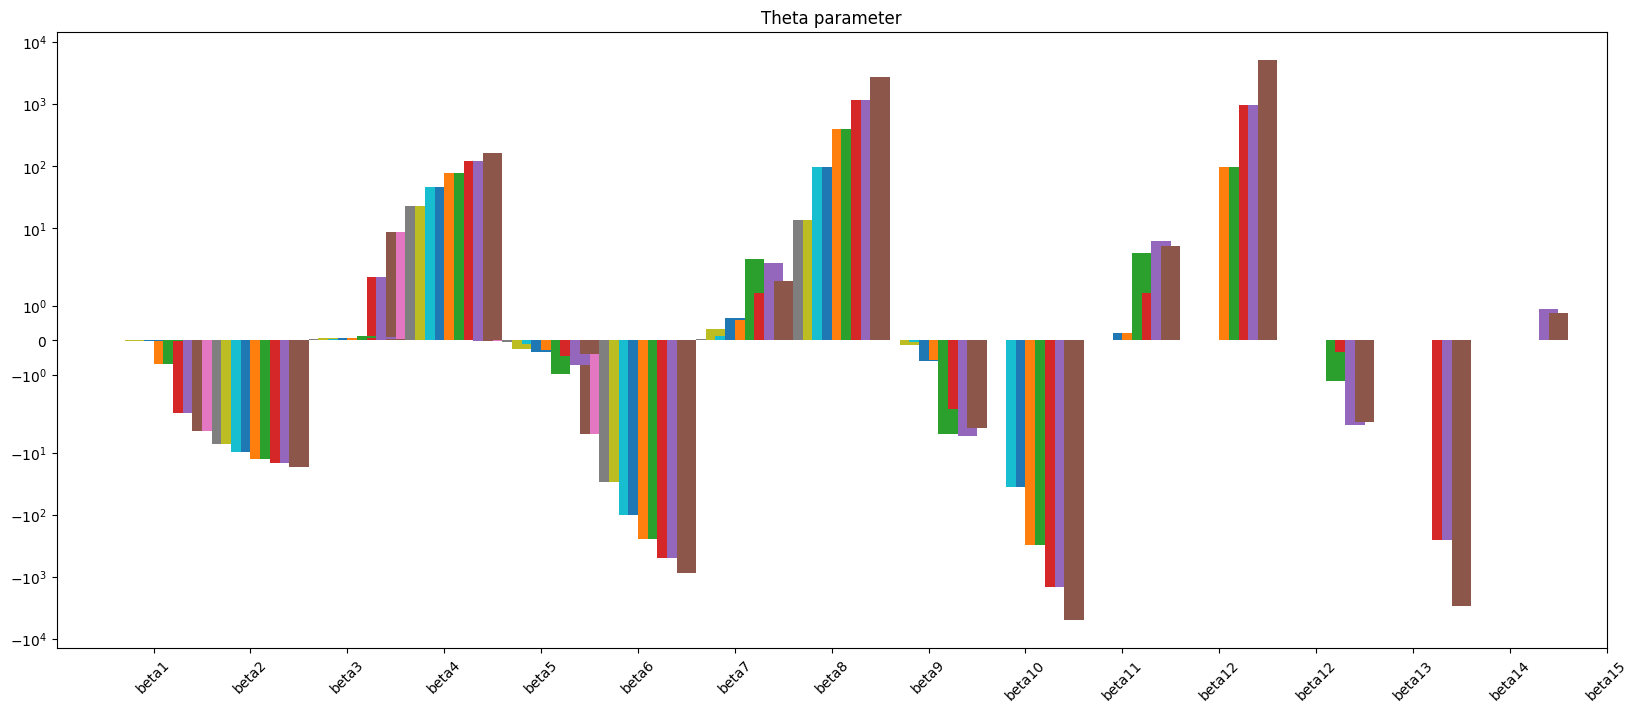

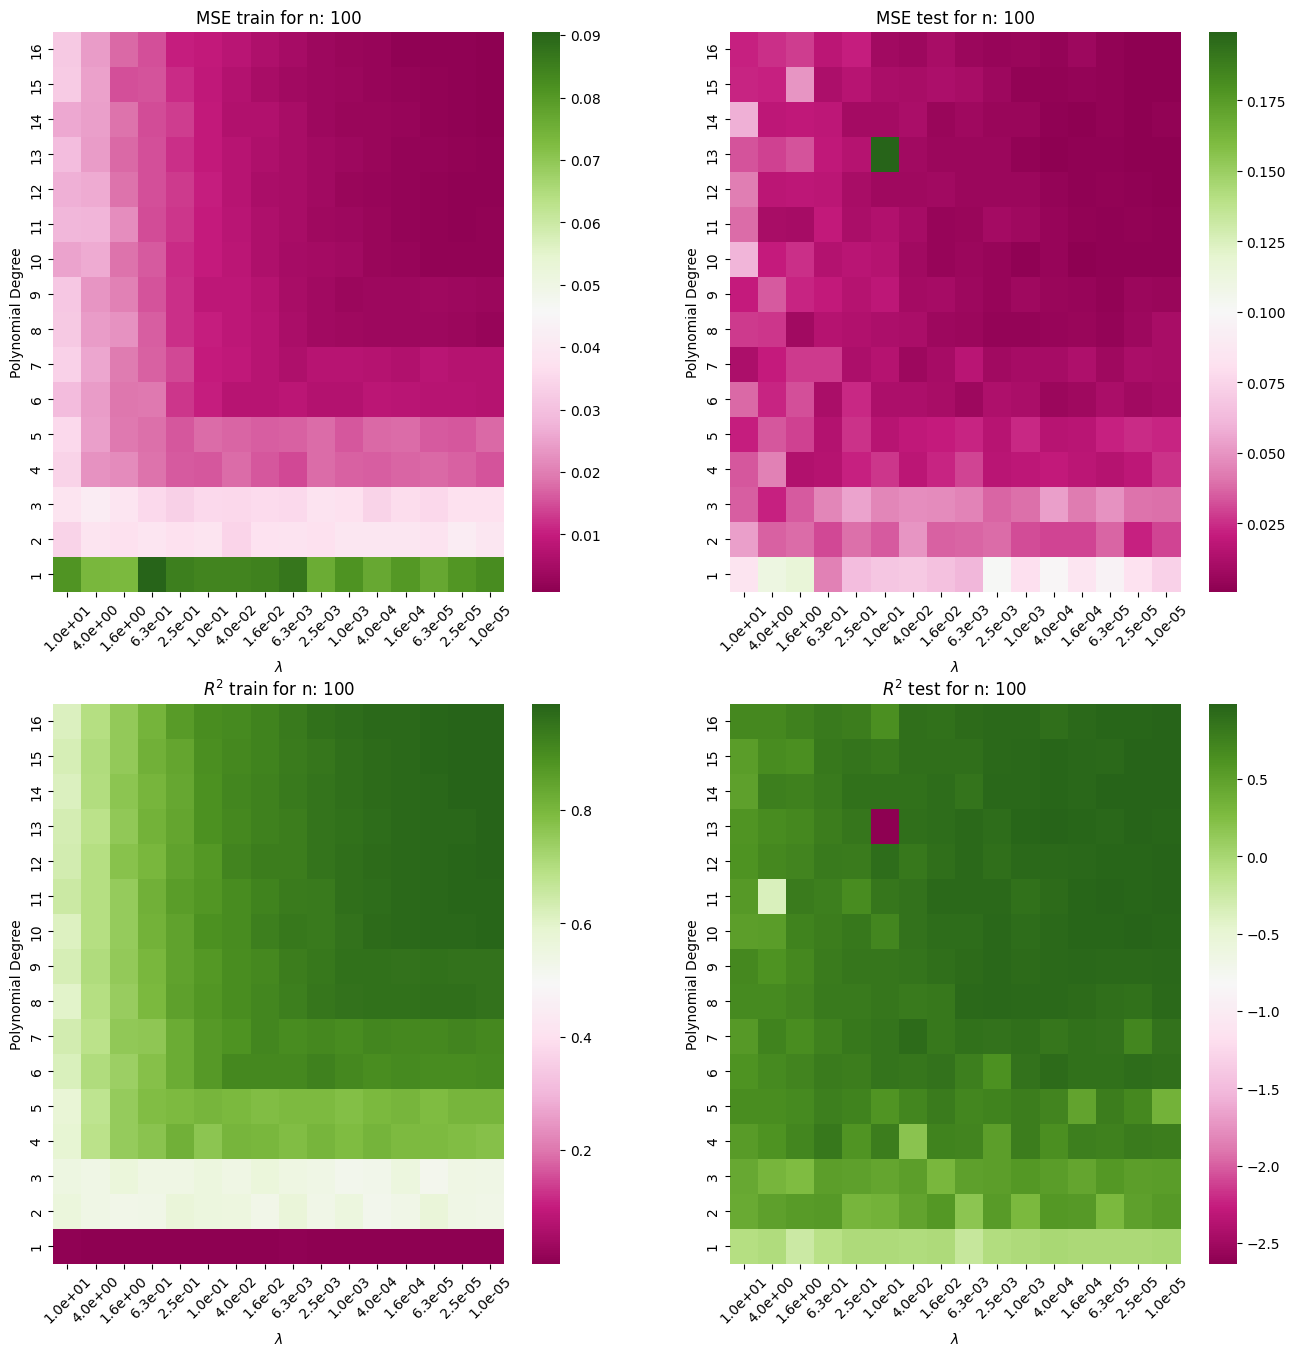

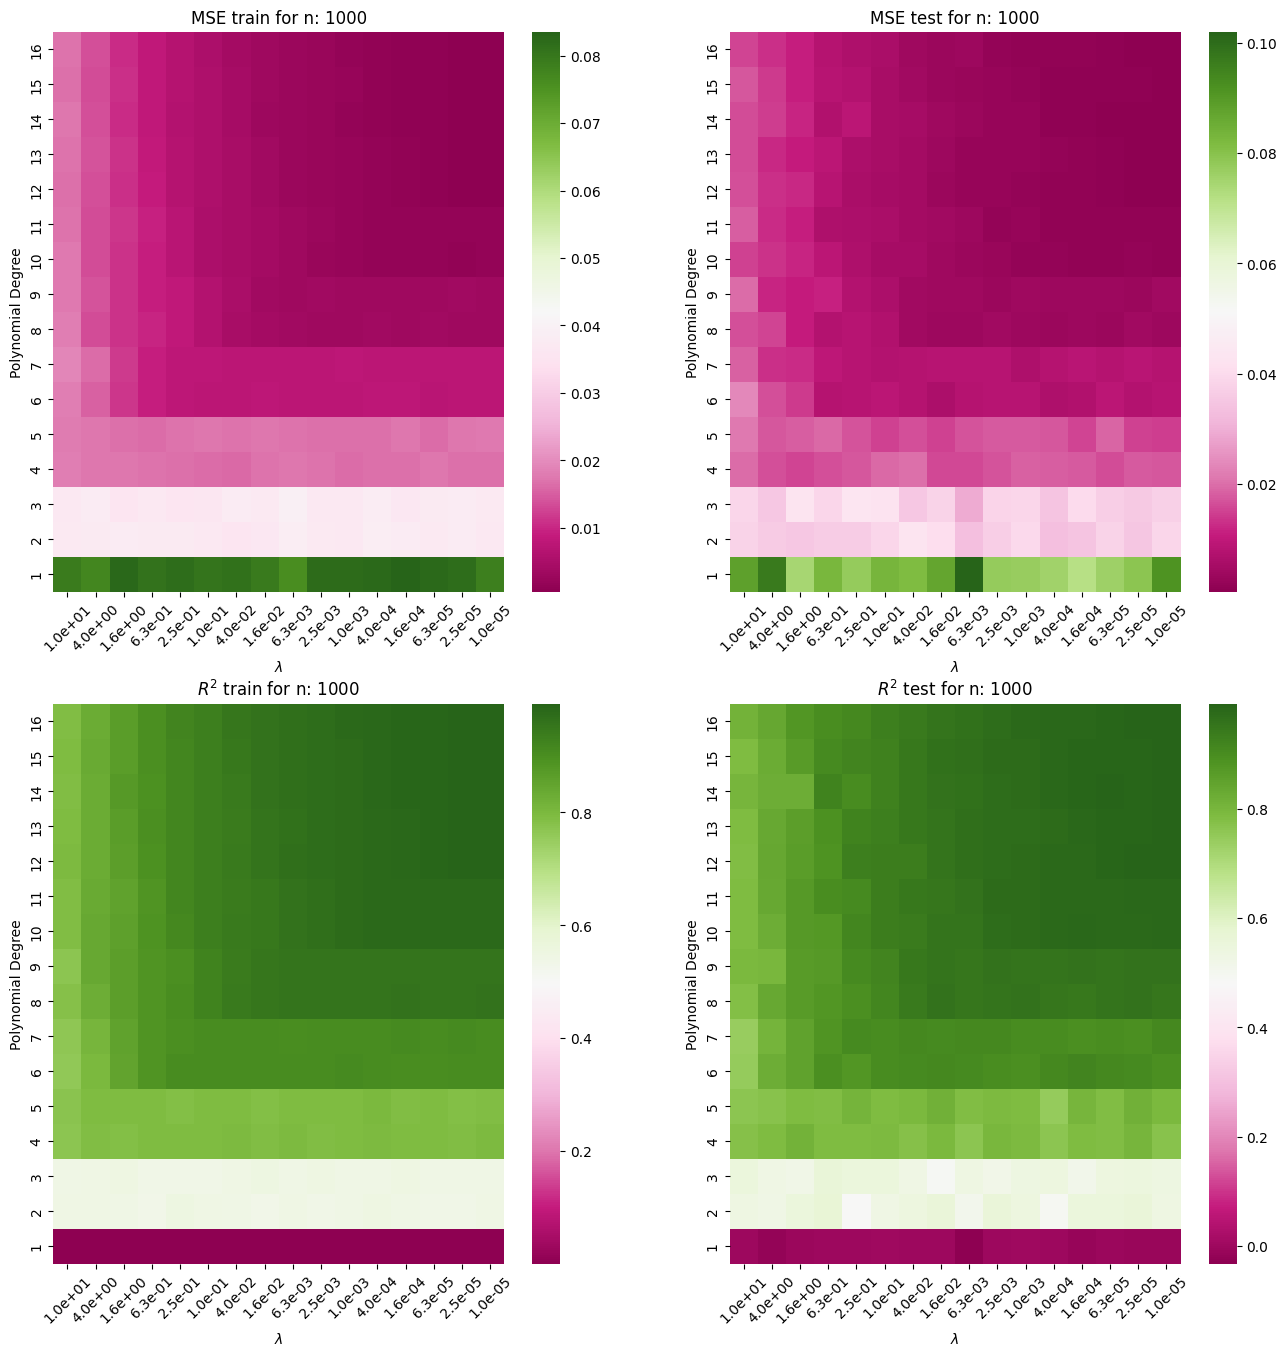

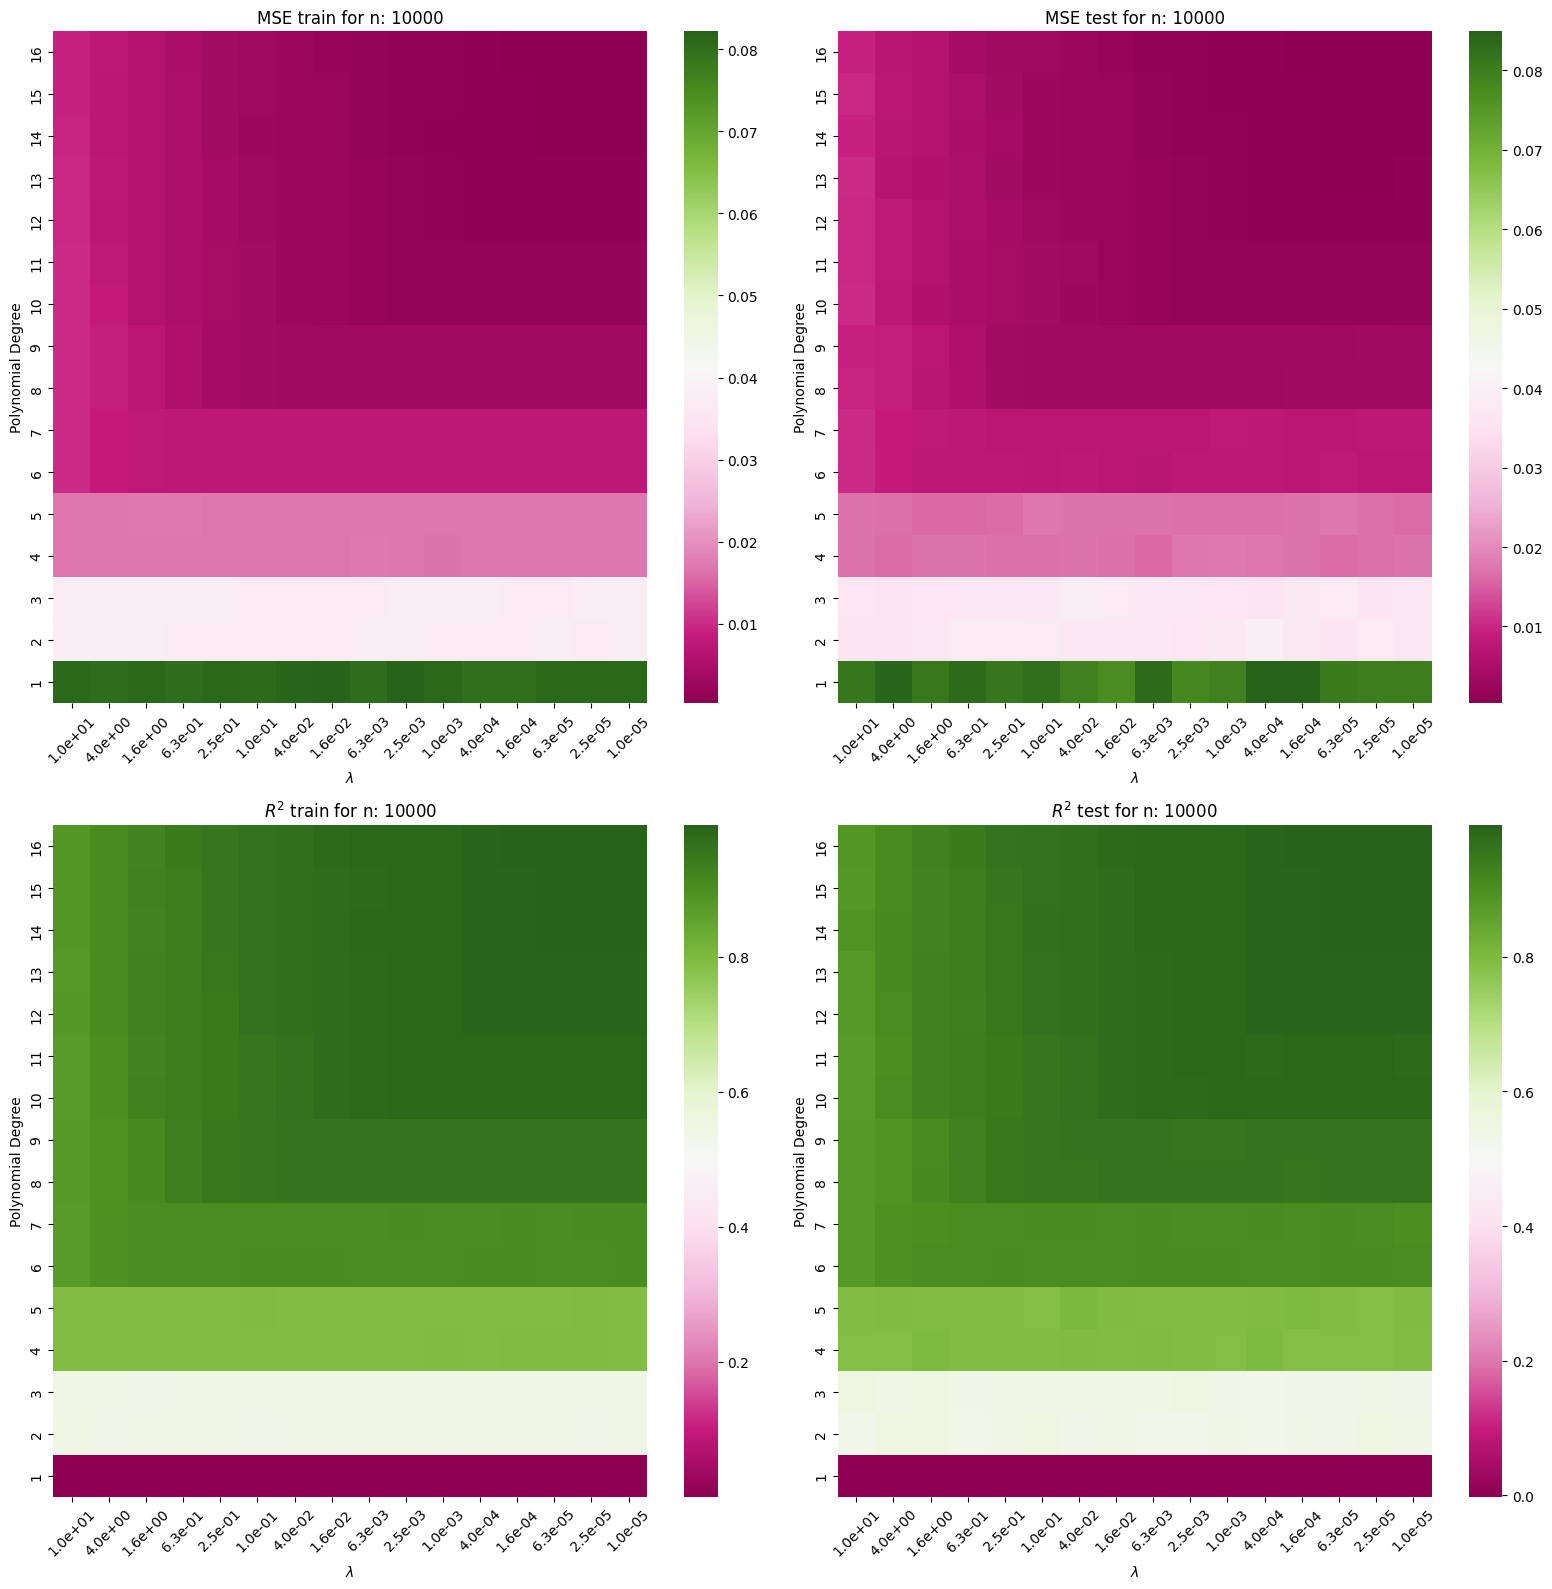

loop broken at 825 for degree: 1
loop broken at 695 for degree: 2
loop broken at 743 for degree: 3
loop broken at 705 for degree: 4
loop broken at 710 for degree: 5
loop broken at 718 for degree: 6
loop broken at 745 for degree: 7
loop broken at 749 for degree: 8
loop broken at 708 for degree: 9
loop broken at 705 for degree: 10
loop broken at 743 for degree: 11
loop broken at 693 for degree: 12
loop broken at 688 for degree: 13
loop broken at 736 for degree: 14
loop broken at 659 for degree: 15
loop broken at 737 for degree: 16


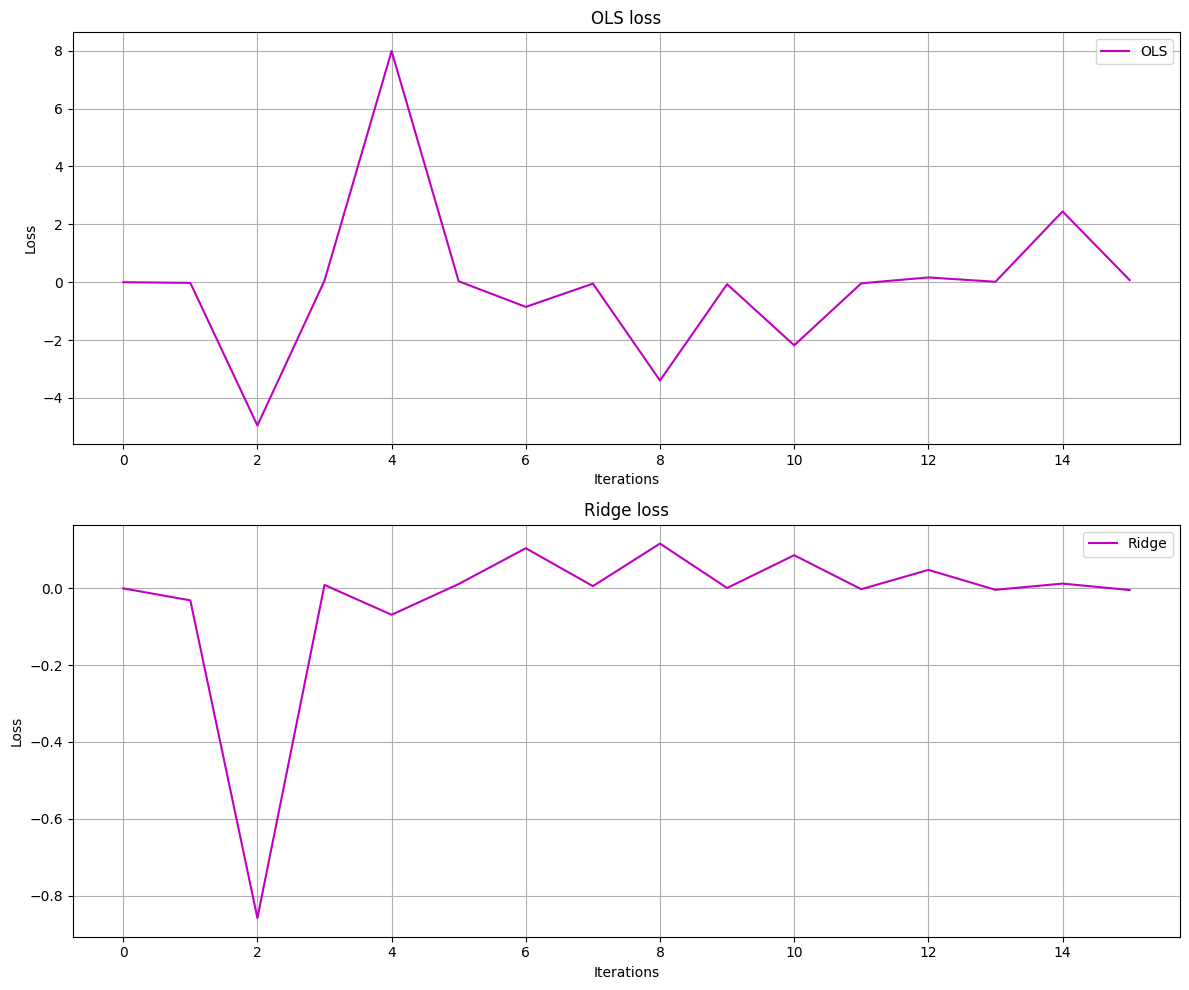

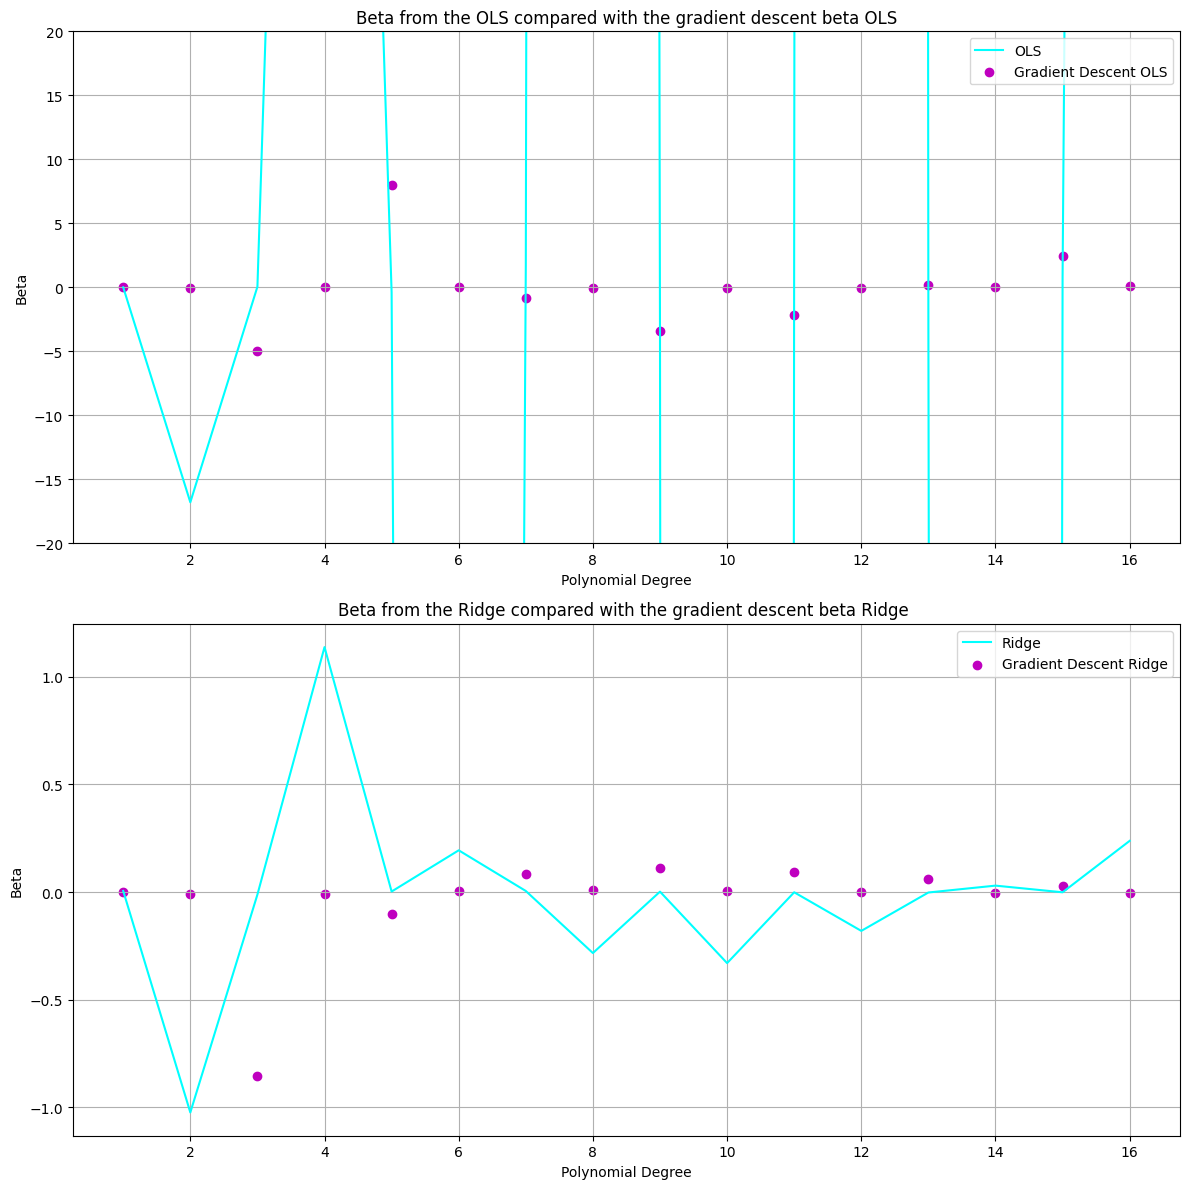

In [292]:
def compare_a_b_c(degree=16):
    #run functions:
    beta_ols = mse_poly_plot_OLS(degree, intercept = False)
    beta_ridge = poly_plot_ridge(intercept=False, annotate=False)

    theta_gdOLSn, theta_gdRidgen = gradient(x,y,n_feat=degree, degree=degree)

    x_line = np.arange(1, degree +1)
    fig, ax = plt.subplots(2,1, figsize = (12,12))
    ax[0].plot(x_line, beta_ols[1:degree+1], label = f'OLS', color = 'cyan')
    ax[0].scatter(x_line, theta_gdOLSn, color = 'm', label = 'Gradient Descent OLS')
    ax[0].grid(True)
    ax[0].set_title('Beta from the OLS compared with the gradient descent beta OLS')
    ax[0].set_xlabel('Polynomial Degree')
    ax[0].set_ylabel('Beta')
    ax[0].legend()

    ax[1].plot(x_line, beta_ridge[1:degree+1], label = f'Ridge', color = 'cyan')
    ax[1].scatter(x_line, theta_grad_ridge, color = 'm', label = 'Gradient Descent Ridge')
    ax[1].grid(True)
    ax[1].set_title('Beta from the Ridge compared with the gradient descent beta Ridge ')
    ax[1].set_xlabel('Polynomial Degree')
    ax[1].set_ylabel('Beta')
    ax[1].legend()
    ax[0].set_ylim(-20,20)
    plt.tight_layout()
    plt.show()

compare_a_b_c()

# Exercise D